## Neive-Bayes
Neive bayes is extremely fast relative to other classification algorithms. It works on Bayes theorem of probability to predict the class of unknown data sets.

Bayes Theorem provides a way that we can calculate the probability of a piece of data belonging to a given class, given our prior knowledge. Bayes’ Theorem is stated as:

P(class|data) = (P(data|class) * P(class)) / P(data)

Where P(class|data) is the probability of class given the provided data.

**Steps**

1: Separate the data poins by label.

2: Calculate the mean, standard deviation of the each features in label wise

3: calculate class probabilities of each test data using Gaussian Probability theorem.

Gaussian conditional probability is given by:
![](https://miro.medium.com/max/1576/1*0If5Mey7FnW_RktMM5BkaQ.png)

In [1]:
from sklearn.datasets.samples_generator import make_blobs 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_features= 2

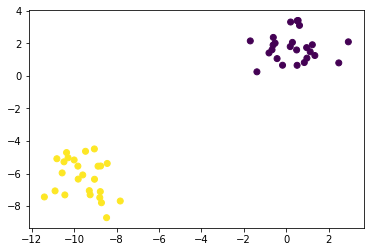

In [3]:
(X,Y) = make_blobs(n_samples=50,n_features=n_features,centers=2,random_state=101)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [4]:
classes = set(Y)
classes

{0, 1}

In [5]:
sep = {}
for c in classes:
    sep[c]=[]

In [6]:
def seperate(datas,labels):
    for data,label in zip(datas,labels):
        sep[label].append(data)
      
    for c,d in sep.items():
        sep[c]=np.array(d)
    return sep

In [7]:
sep =seperate(X,Y)
sep[0][:2],sep[1][:2]

(array([[0.85678605, 0.8243512 ],
        [2.482819  , 0.80309288]]), array([[-10.47729501,  -5.2768023 ],
        [ -8.76419615,  -7.1078015 ]]))

In [8]:
#mean = sum(inputs) / len(inputs)
def mean(inp):
    return np.mean(inp)

In [9]:
#variance = average of the squared differences for each attribute value from the mean
#The standard deviation is calculated as the square root of the variance
#The standard deviation describes the variation of spread of the data
#sqrt((sum(square(inputs - mean)) / (no.of samples -1)))
def std_deviation(inp):
    M = mean(inp)
    variance = np.sum([(inp-M)**2])/float(len(inp)-1)
    return np.sqrt(variance)

In [10]:
def each_class_mean_stddev(inp,n_features):
    out=[]
    for i in range(n_features):
        att = inp[:,i]
        out.append((mean(att),std_deviation(att)))
    return(out)

In [11]:
def summarize(sep,n_features):
    result = {}
    for c,d in sep.items():
        result[c]=each_class_mean_stddev(d,n_features)
    return result

In [12]:
result=summarize(sep,n_features)
result

{0: [(0.33972747210787907, 1.078446608533793),
  (1.7603553378516426, 0.875017644389)],
 1: [(-9.565614350467806, 0.9158198552063763),
  (-6.2415034984999975, 1.1756567045775386)]}

In [13]:
def calculateProbability(x, mean, stdev):
    exponent = np.exp(-(x-mean)**2/(2*(stdev**2)))
    return (1 / (np.sqrt(2*np.pi) * stdev)) * exponent

In [14]:
def class_prob(summaries, inp):
    prob = {}
    for c, summ in summaries.items():
        prob[c] = 1
        for i in range(len(summ)):
            mean, stdev = summ[i]
            x = inp[i]
            prob[c] *= calculateProbability(x, mean, stdev)
    return prob

In [15]:
t = [1,2] #testing
class_prob(result,t)

{0: 0.13468555749691988, 1: 3.9535046806139403e-41}

In [16]:
def predict(summaries, inp):
    probs = class_prob(summaries, inp)
    bestLabel, bestProb = None, -1
    for c, prob in probs.items():
        if bestLabel is None or prob > bestProb:
            bestProb = prob
            bestLabel = c
    return bestLabel

In [17]:
predict(result,t)

0

In [18]:
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

In [19]:
testSet = [[1,2],[2,3]]

In [20]:
getPredictions(result, testSet)

[0, 0]

In [21]:
X[:2]

array([[0.85678605, 0.8243512 ],
       [2.482819  , 0.80309288]])

In [22]:
predictions = getPredictions(result, X)
predictions[:3]

[0, 0, 1]

In [23]:
def getAccuracy(correct_label, predictions):
    correct = 0
    for x in range(len(testSet)):
        if correct_label[x] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [24]:
getAccuracy(Y,predictions)

100.0